In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


# Data Extraction

In [2]:
df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data Analysis (EDA)

In [3]:
#check the shape of dataset
df.shape


(5110, 12)

In [4]:
#check all columns
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
#check type of dataset
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
#check missing value of dataset
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
# Dropping the 'Other' values of the Gender column and treating missing data
df = df.replace({'Other':np.NaN})
df = df.dropna()
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


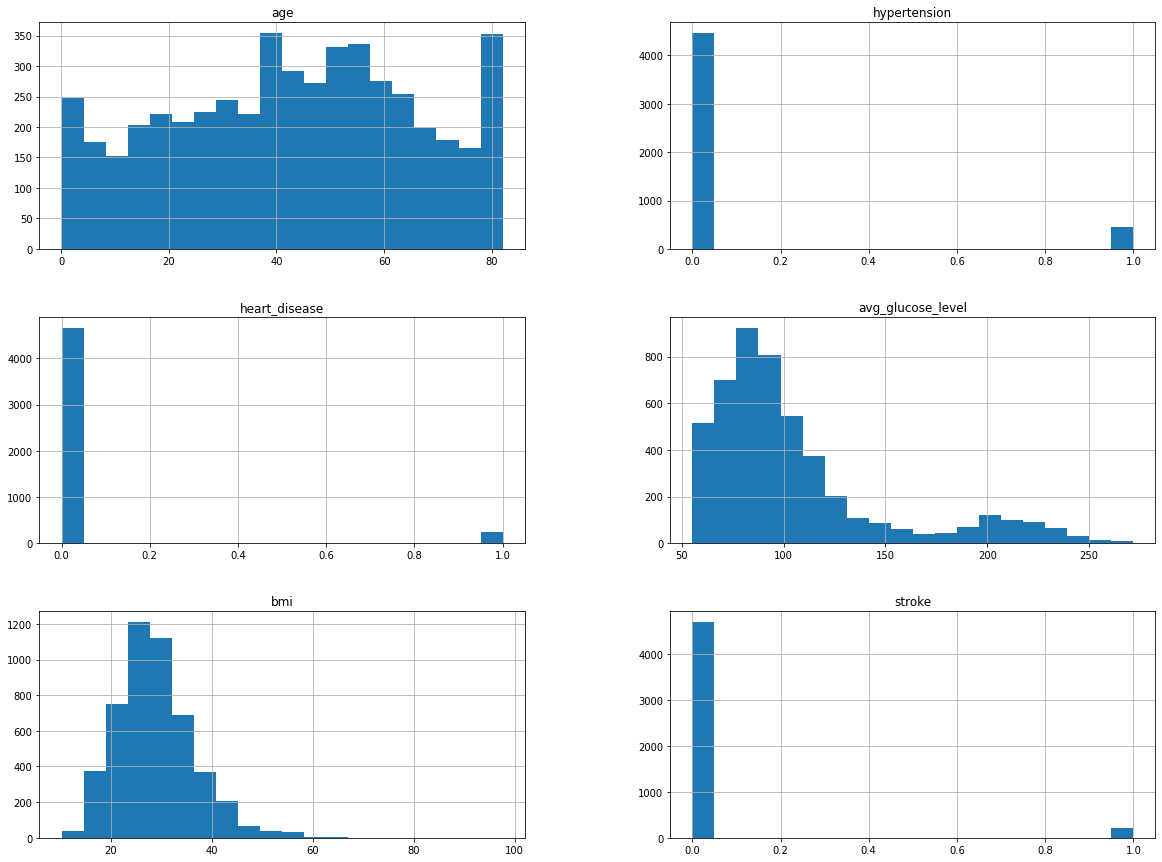

In [8]:
#plotar o histograma das variaveis numéricas
df_without_id = df.drop(columns='id')
df_without_id.hist(bins=20, figsize=(20,15));

([<matplotlib.patches.Wedge at 0x7efcc8853590>,
 [Text(-0.307755600196639, 1.0560712525902818, 'Female'),
  Text(0.30775560019663867, -1.0560712525902818, 'Male')],
 [Text(-0.16786669101634855, 0.5760388650492445, '59.03%'),
  Text(0.16786669101634835, -0.5760388650492446, '40.97%')])

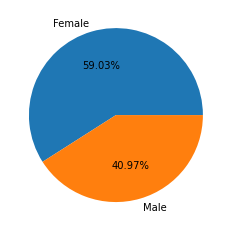

In [9]:
# Plotting Male x Female
legend = df['gender'].value_counts().index
plt.pie(x=df['gender'].value_counts(),labels=legend,autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x7efcc81c0750>,
 [Text(-1.0867202370283893, 0.17040870409976638, 'Not Heart Disease'),
  Text(1.0867202310453332, -0.17040874225455038, 'Heart Disease')],
 [Text(-0.5927564929245759, 0.09295020223623619, '95.05%'),
  Text(0.5927564896610907, -0.09295022304793656, '4.95%')])

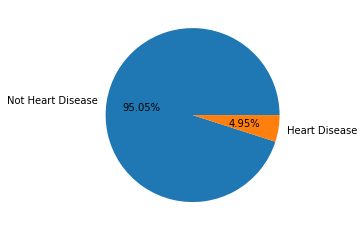

In [10]:
# Plotting Heart Disease x Not Heart Disease 
legend = [0,0]
aux = df.heart_disease.value_counts().index
x = np.where(aux == 1)[0][0]
legend[x] = 'Heart Disease'
y = np.where(aux == 0)[0][0]
legend[y] = 'Not Heart Disease'
plt.pie(x=df.heart_disease.value_counts(),labels=legend,autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x7efcc81d44d0>,
 [Text(-1.05448145132456, 0.3131594942077438, 'Not Hypertension'),
  Text(1.0544814293344762, -0.31315956825350283, 'Hypertension')],
 [Text(-0.5751717007224871, 0.17081426956786022, '90.81%'),
  Text(0.575171688727896, -0.17081430995645605, '9.19%')])

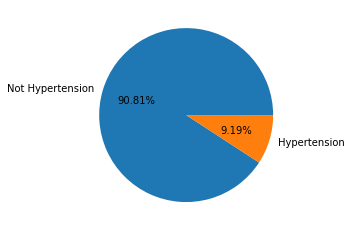

In [11]:
# Plotting Hypertension x Not Hypertension 
legend = [0,0]
aux = df.hypertension.value_counts().index
x = np.where(aux == 1)[0][0]
legend[x] = 'Hypertension'
y = np.where(aux == 0)[0][0]
legend[y] = 'Not Hypertension'
plt.pie(x=df.hypertension.value_counts(),labels=legend,autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x7efcc821da10>,
 [Text(-1.0901712601200462, 0.14671954064905907, 'Not Stroke'),
  Text(1.0901712652713733, -0.1467195023731096, 'Stroke')],
 [Text(-0.5946388691563887, 0.08002884035403221, '95.74%'),
  Text(0.5946388719662036, -0.08002881947624159, '4.26%')])

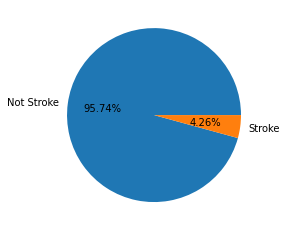

In [12]:
# Plotting Stroke x Not Stroke
legend = [0,0]
aux = df.stroke.value_counts().index
x = np.where(aux == 1)[0][0]
legend[x] = 'Stroke'
y = np.where(aux == 0)[0][0]
legend[y] = 'Not Stroke'
plt.pie(x=df.stroke.value_counts(),labels=legend,autopct='%1.2f%%')

In [13]:
# Checking the correlation between the variables

df_without_id.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.274395,0.257104,0.236000,0.333314,0.232313
hypertension,0.274395,1.000000,0.115978,0.180614,0.167770,0.142503
heart_disease,0.257104,0.115978,1.000000,0.154577,0.041322,0.137929
avg_glucose_level,0.236000,0.180614,0.154577,1.000000,0.175672,0.138984
bmi,0.333314,0.167770,0.041322,0.175672,1.000000,0.042341
stroke,0.232313,0.142503,0.137929,0.138984,0.042341,1.000000


<Figure size 720x576 with 0 Axes>

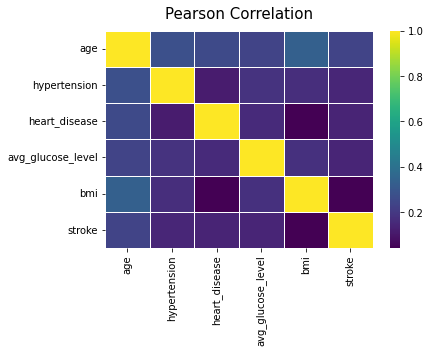

<Figure size 720x576 with 0 Axes>

In [14]:
#visualize correlation of each variable using pearson correlation
sns.heatmap(df_without_id.corr(), vmax = 1, linewidths = 0.9, cmap = 'viridis')
plt.title('Pearson Correlation', fontsize = 15, pad = 12)
plt.figure(figsize = (10,8))

# Machine Learning - Predict Stroke 

In [15]:
df_without_id.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [16]:
# Looking into the ever_married category
df_without_id.ever_married.unique()

#Replacing Values:
# 'Yes'       = 1
# 'No'        = 0

df_without_id = df_without_id.replace({'Yes':1,'No':0})

In [17]:
# Looking into the work_type category
df_without_id.work_type.unique()

#Replacing Values:
# 'Private'       = 0
# 'Self-employed' = 1
# 'Govt_job'      = 2
# 'children'      = 3
# 'Never_worked'  = 4

df_without_id = df_without_id.replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4})

In [18]:
# Looking into the Residence_type category
df_without_id.Residence_type.unique()

#Replacing Values:
# 'Urban'       = 0
# 'Rural'       = 1

df_without_id = df_without_id.replace({'Urban':0,'Rural':1})

In [19]:
# Looking into the smoking_status category
df_without_id.smoking_status.unique()

#Replacing Values:
# 'formerly smoked'       = 0
# 'never smoked'          = 1
# 'smokes'                = 2
# 'Unknown'               = 3

df_without_id = df_without_id.replace({'formerly smoked':0,'never smoked':1,'smokes':2,'Unknown':3})

In [20]:
# Treating de Gender column
df_machine_learning = df_without_id.replace({'Male':1,'Female':0})
df_machine_learning.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,0,228.69,36.6,0,1
2,1,80.0,0,1,1,0,1,105.92,32.5,1,1
3,0,49.0,0,0,1,0,0,171.23,34.4,2,1
4,0,79.0,1,0,1,1,1,174.12,24.0,1,1
5,1,81.0,0,0,1,0,0,186.21,29.0,0,1


In [21]:
preditora = df_machine_learning.drop('stroke',axis=1)
alvo      = df_machine_learning['stroke']

In [22]:
x_treino,x_test,y_treino,y_test = train_test_split(preditora, alvo, test_size = 0.3)

In [23]:
# ExtraTreesClassifier

#An extra-trees classifier.

#This class implements a meta estimator that fits a number of randomized decision trees 
#(a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the 
#predictive accuracy and control over-fitting.

modelo = ExtraTreesClassifier()
modelo.fit(x_treino,y_treino)

resultado = modelo.score(x_test,y_test)
print('Acurácia: ',resultado)

Acurácia:  0.9470468431771895
